## Importing the data and all the functions and libraries related to this job.

In [92]:
import pandas as pd
import numpy as np
import re 
import nltk
import os

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
from textblob import TextBlob

nltk.download('stopwords')

def accuracy(matrix):
    return((matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javier.Bustos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [94]:
dataset = pd.read_csv(r'C:\Users\Javier.Bustos\Documents\Personal Assignment/Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')

## Observation:
As we can see below the data that we have, we know is only a review about the restaurant and if the client liked or not his experience in the restaurant.<br> <br>
In this case, because we don't have a lot of time we will only try to predict if the client liked or not his experience at the restaurant, looking the most used words by the clients at the first try. <br><br>
As you can see below, I will run a basic model in which I remove all the but letters, put all the letters in lower case, splitting the data in words and recieving his root word, and put everything in diferents models. After that we will make an analysis for choosing a method.

In [95]:
display(dataset)

Review  Liked
0    "I also had to taste my Mom's multi-grain pump...      1
1            "I'd rather eat airline food, seriously."      0
2        Cant say enough good things about this place.      1
3                         The ambiance was incredible.      1
4            The waitress and manager are so friendly.      1
5                    I would not recommend this place.      0
6           Overall I wasn't very impressed with Noca.      0
7                  My gyro was basically lettuce only.      0
8                                    Terrible service!      0
9                             Thoroughly disappointed!      0
10   "I don't each much pasta, but I love the homem...      1
11         "Give it a try, you will be happy you did."      1
12       By far the BEST cheesecurds we have ever had!      1
13                             Reasonably priced also!      1
14        Everything was perfect the night we were in.      1
15    The food is very good for your typical bar food.      1
16                        it was a drive to get there.      0
17   "At first glance it is a lovely bakery cafe - ...      1
18      "Anyway, I do not think i will go back there."      0
19   "Point your finger at any item on the menu, or...      1
20      "Oh this is such a thing of beauty, this bar."      1
21                    If you haven't gone here GO NOW!      1
22                         "A greasy, unhealthy meal."      0
23        first time there and might just be the last.      0
24                         Those burgers were amazing.      1
25   "Similarly, the delivery man did not say a wor...      0
26                        And it was way to expensive.      0
27   "Be sure to order dessert, even if you need to...      1
28   This was my first time and I can't wait until ...      1
29                        The bartender was also nice.      1
..                                                 ...    ...
470  "This is was due to the fact that it took 20 m...      0
471                        "Love the margaritas, too!"      1
472  This was my first and only Vegas buffet and it...      1
473                               "Very good, though!"      1
474  The one down note is the ventilation could use...      0
475                               Great pork sandwich.      1
476                        Don't waste your time here.      0
477  "Total letdown, I would much rather just go to...      0
478  "Third, the cheese on my friend's burger was c...      0
479                   We enjoy their pizza and brunch.      1
480  The steaks are all well trimmed and also perfe...      1
481  We had a group of 70+ when we claimed we would...      1
482                                        I LOVED it!      1
483  We asked for the bill to leave without eating ...      0
484  "This place is a jewel in Las Vegas, and exact...      1
485  Seafood was limited to boiled shrimp and crab ...      0
486            The selection of food was not the best.      0
487           Delicious and I will absolutely be back!      1
488  "This isn't a small family bar, this is a fine...      1
489  They had a toro tartare with a cavier that was...      1
490  I dont think I will be back for a very long time.      0
491  "It was attached to a gas station, and that is...      0
492                               How awesome is that.      1
493                    I will be back many times soon.      1
494  The menu had so much good stuff on it i could ...      1
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

[500 rows x 2 columns]

In [110]:
corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [111]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = dataset.iloc[:, 1].values #Defining our response variable

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)



In [112]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# fit a Linear Discriminant Analysis Model
classifier_lda = LinearDiscriminantAnalysis()
classifier_lda.fit(X_train, y_train)

# fit a K neighbors Model
classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_train, y_train)

# fit a Decision Tree Model
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

# fit a Support Vector Machine Model
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred  = classifier_nb.predict(X_test)
lr_y_pred  = classifier_lr.predict(X_test)
lda_y_pred = classifier_lda.predict(X_test)
kn_y_pred  = classifier_kn.predict(X_test)
dt_y_pred  = classifier_dt.predict(X_test)
svm_y_pred  = classifier_svm.predict(X_test)

# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Naive Bayes Confusion Matrix:")
print("Accuracy:", accuracy(nb_cm))
print(nb_cm,"\n")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print("Logistic Regression Confusion Matrix:")
print("Accuracy:", accuracy(lr_cm))
print(lr_cm,"\n")
lda_cm = confusion_matrix(y_test, lda_y_pred)
print("Linear Discriminant Analysis Confusion Matrix:")
print("Accuracy:", accuracy(lda_cm))
print(lda_cm,"\n")
kn_cm = confusion_matrix(y_test, kn_y_pred)
print("K Neighbor Confusion Matrix:")
print("Accuracy:", accuracy(kn_cm))
print(kn_cm,"\n")
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Trees Confusion Matrix:")
print("Accuracy:", accuracy(dt_cm))
print(dt_cm,"\n")
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Support Vector Machine Confusion Matrix:")
print("Accuracy:", accuracy(svm_cm))
print(svm_cm,"\n")

Naive Bayes Confusion Matrix:
Accuracy: 0.71
[[27 23]
 [ 6 44]] 

Logistic Regression Confusion Matrix:
Accuracy: 0.7
[[35 15]
 [15 35]] 

Linear Discriminant Analysis Confusion Matrix:
Accuracy: 0.66
[[35 15]
 [19 31]] 

K Neighbor Confusion Matrix:
Accuracy: 0.63
[[40 10]
 [27 23]] 

Decision Trees Confusion Matrix:
Accuracy: 0.7
[[32 18]
 [12 38]] 

Support Vector Machine Confusion Matrix:
Accuracy: 0.73
[[42  8]
 [19 31]] 



No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768
Linear Discriminant Analysis: ROC AUC=0.642
K Neighbor: ROC AUC=0.670
Decision Trees: ROC AUC=0.700

NS behavior:


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0


NB behavior:


threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00


LR behavior:


threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00


LDA behavior:


threshold   tpr   fpr
0    2.000000e+00  0.00  0.00
1    1.000000e+00  0.56  0.26
2    1.000000e+00  0.58  0.26
3    1.000000e+00  0.58  0.28
4    9.999986e-01  0.60  0.28
5    9.987755e-01  0.60  0.30
6    9.253147e-01  0.62  0.30
7    1.708143e-12  0.62  0.40
8    4.033443e-14  0.64  0.40
9    3.093463e-19  0.64  0.46
10   8.808519e-20  0.66  0.46
11   1.776253e-37  0.66  0.54
12   2.655527e-38  0.70  0.54
13   1.314678e-44  0.70  0.56
14   8.169281e-46  0.72  0.56
15   4.436116e-48  0.72  0.62
16   2.772494e-49  0.76  0.62
17   1.116943e-50  0.76  0.66
18   3.886134e-66  0.84  0.66
19   2.952190e-76  0.84  0.80
20   1.009477e-80  0.86  0.80
21   2.200062e-86  0.86  0.84
22   7.609272e-94  0.92  0.84
23   5.470319e-98  0.92  0.88
24  7.028535e-106  0.96  0.88
25  1.238753e-135  0.96  0.98
26  3.959007e-156  0.98  0.98
27  6.070413e-208  0.98  1.00
28  4.309567e-226  1.00  1.00


DT behavior:


threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.76  0.36
2        0.0  1.00  1.00


KN behavior:


threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.04  0.00
2        0.8  0.18  0.04
3        0.6  0.46  0.20
4        0.4  0.62  0.38
5        0.2  0.90  0.76
6        0.0  1.00  1.00

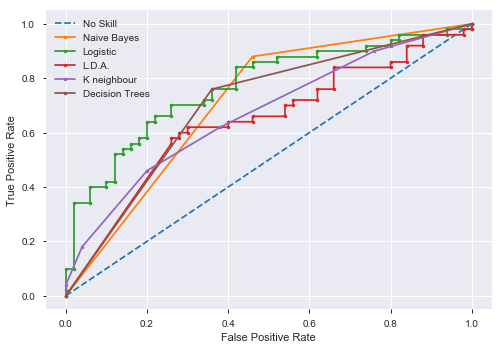

Threshold evaluated in 5.6e-41:
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 1.0
LR Specificity: 0.0
LDA Sensitivity: 0.7
LDA Specificity: 0.45999999999999996
KN Sensitivity: 0.9
KN Specificity: 0.24
DT Sensitivity: 0.76
DT Specificity: 0.64

Threshold evaluated in 0.35:
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.86
LR Specificity: 0.54
LDA Sensitivity: 0.62
LDA Specificity: 0.7
KN Sensitivity: 0.9
KN Specificity: 0.24
DT Sensitivity: 0.76
DT Specificity: 0.64

Threshold evaluated in 0.5:
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.7
LR Specificity: 0.74
LDA Sensitivity: 0.62
LDA Specificity: 0.7
KN Sensitivity: 0.9
KN Specificity: 0.24
DT Sensitivity: 0.76
DT Specificity: 0.64

Threshold evaluated in 0.75:
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.4
LR Specificity: 0.9
LDA Sensitivity: 0.62
LDA Specificity: 0.7
KN Sensitivity: 0.9
KN Specificity: 0.24
DT Sensitivity: 0.76
DT Specificity: 0.64


In [113]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)
lda_probs = classifier_lda.predict_proba(X_test)
kn_probs = classifier_kn.predict_proba(X_test)
dt_probs = classifier_dt.predict_proba(X_test)
#svm_probs = classifier_svm.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
lda_probs = lda_probs[:, 1]
kn_probs = kn_probs[:, 1]
dt_probs = dt_probs[:, 1]
#svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lda_auc = roc_auc_score(y_test, lda_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
#svm_auc = roc_auc_score(y_test, svm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Linear Discriminant Analysis: ROC AUC=%.3f' % (lda_auc))
print('K Neighbor: ROC AUC=%.3f' % (kn_auc))
print('Decision Trees: ROC AUC=%.3f' % (dt_auc))
#print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)
lda_fpr, lda_tpr, lda_thresholds  = roc_curve(y_test, lda_probs)
kn_fpr, kn_tpr, kn_thresholds  = roc_curve(y_test, kn_probs)
dt_fpr, dt_tpr, dt_thresholds  = roc_curve(y_test, dt_probs)
#svm_fpr, svm_tpr, svm_thresholds  = roc_curve(y_test, svm_probs)

#get roc curve metrics
from IPython.display import display

print("\nNS behavior:")
ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

print("\nNB behavior:")
nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

print("\nLR behavior:")
lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

print("\nLDA behavior:")
lda_df = pd.DataFrame(data=[])
lda_df['threshold'] = lda_thresholds
lda_df['tpr'] = lda_tpr
lda_df['fpr'] = lda_fpr
display(lda_df)

print("\nDT behavior:")
dt_df = pd.DataFrame(data=[])
dt_df['threshold'] = dt_thresholds
dt_df['tpr'] = dt_tpr
dt_df['fpr'] = dt_fpr
display(dt_df)

print("\nKN behavior:")
kn_df = pd.DataFrame(data=[])
kn_df['threshold'] = kn_thresholds
kn_df['tpr'] = kn_tpr
kn_df['fpr'] = kn_fpr
display(kn_df)

#svm_df = pd.DataFrame(data=[])
#svm_df['threshold'] = svm_thresholds
#svm_df['tpr'] = svm_tpr
#svm_df['fpr'] = svm_fpr
#display(lr_svm)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.plot(lda_fpr, lda_tpr, marker='.', label='L.D.A.')
ax1.plot(kn_fpr, kn_tpr, marker='.', label='K neighbour')
ax1.plot(dt_fpr, dt_tpr, marker='.', label='Decision Trees')
#ax1.plot(svm_fpr, svm_tpr, marker='.', label='Supported Vector Machine')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])
    
def evaluate_threshold_lda(threshold):
    print('LDA Sensitivity:', lda_tpr[lda_thresholds > threshold][-1])
    print('LDA Specificity:', 1 - lda_fpr[lda_thresholds > threshold][-1])    

def evaluate_threshold_kn(threshold):
    print('KN Sensitivity:', kn_tpr[kn_thresholds > threshold][-1])
    print('KN Specificity:', 1 - kn_fpr[kn_thresholds > threshold][-1])    

def evaluate_threshold_dt(threshold):
    print('DT Sensitivity:', dt_tpr[dt_thresholds > threshold][-1])
    print('DT Specificity:', 1 - dt_fpr[dt_thresholds > threshold][-1])    
    
#def evaluate_threshold_svm(threshold):
#    print('SVM Sensitivity:', svm_tpr[svm_thresholds > threshold][-1])
#    print('SVM Specificity:', 1 - svm_fpr[svm_thresholds > threshold][-1])    

print("Threshold evaluated in 5.6e-41:")
evaluate_threshold_nb(5.654338e-41)
evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_lda(5.654338e-41)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.35:")
evaluate_threshold_nb(0.357685)
evaluate_threshold_lr(0.357685)
evaluate_threshold_lda(0.357685)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.5:")
evaluate_threshold_nb(0.5)
evaluate_threshold_lr(0.5)
evaluate_threshold_lda(0.5)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.75:")
evaluate_threshold_nb(0.75)
evaluate_threshold_lr(0.75)
evaluate_threshold_lda(0.75)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

## After First Test Observation:
After looking the results of several test, we can check that in general the accuracy of the models ins't so good but also is very bad. So is mandatory to improve our strategy. Because this is a categorisation problem isn't so surprising that models like Logistic Regression or Decision Trees are the ones with highest accuracy rate.<br> We will keep a special attention in this two models ratter than Support Vector Machine Model, because if we check the Area under the curve of ROC values, of this two models is also good (>= 0.7). Naive Bayes also looks very good, we will also keep an eye on it.

### Future Strategy:
By time issues I will talk about all the changes that I did with the model in one hit.<br>
- So after looking the data I saw that a lot of reviews has complete words un upper case, elevating the meaning about they said, so I decided to keep the words with the case that they come from the data.
- Also I did a sentimental analysis of every review, so I added to more values to this data analysis, the "polarity" and "subjectivity" values. <br>subjectivity value is between 0 and 1 and the polarity value is between -1 and 1 so I decided to keep this value between 0 and 1 doing a simple linear transformation.
- I have reduced the amount of word taked by most used word, taking only the 250 most used words isntead 1000, only by the criteria that 1000 words over 500 reviews I think that I will overcatch enought words from this analysis.
- The last strategy that I did was enlarge the test set because in my opinion the confusion matrix are too "sensible" for every perturbation in his values.

Let's look the codes of what I did.
Remark: I used "test_lower_po" and "test_lower_sub" instead "test_upper_po" and "test_upper_sub" only by error because they where totally correlated (rho = 1).<br>
Sorry for the order I runned up of time.

In [114]:
test_lower_po = []
test_lower_sub = []
test_normal_po = []
test_normal_sub = []

for i in range(0, 500):
    data_lower  = dataset["Review"][i]
    data_normal = dataset["Review"][i]
    data_lower = data_lower.lower() #Put all the letters in lowercase
    testimonial = TextBlob(data_lower)
    test_lower_po.append(testimonial.sentiment.polarity)
    test_lower_sub.append(testimonial.sentiment.subjectivity)
    testimonial = TextBlob(data_normal)
    test_normal_po.append(testimonial.sentiment.polarity)
    test_normal_sub.append(testimonial.sentiment.subjectivity)
    
    #review = review.split() #Creates a list of different words
    #ps = PorterStemmer() #We use Stemming for taking the root of words
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review = ' '.join(review) #For reversing the process (list -> string)
    
print(test_lower_po)

[0.46666666666666673, -0.3333333333333333, 0.35, 0.9, 0.375, 0.0, 0.5, 0.0, -1.0, -0.9375, 0.09999999999999998, 0.8, 0.55, 0.25, 1.0, 0.37166666666666665, 0.0, 0.41833333333333333, 0.0, -0.75, 0.0, 0.0, -0.4, 0.125, 0.6000000000000001, -0.15, -0.5, 0.5, 0.125, 0.6, 0.875, 0.0, 1.0, 0.45, -1.0, 0.6454545454545454, 0.0, 0.7500000000000001, -1.0, 1.0, 0.7500000000000001, 0.0, 0.3, -0.05, 0.0, 0.3333333333333333, 0.2, 0.2857142857142857, -0.05, 0.3125, -0.2125, 0.6, 0.0, 0.0, 0.28888888888888886, 0.0625, 0.0, -0.2972222222222222, 1.0, 0.0, -0.16666666666666666, -1.0, 0.875, 0.6000000000000001, 0.8, 0.0, 0.06666666666666667, 1.0, -0.3333333333333333, 0.0, 0.1, -0.17500000000000002, 0.0, 0.5, 0.4777777777777778, 0.02777777777777779, -0.75, 0.6625, 0.48750000000000004, 0.4666666666666667, -0.2020833333333333, 0.0, 0.5, 0.0, 0.0, 0.5854166666666667, 0.0, -0.18888888888888888, 0.5125, -1.0, 0.8, 0.5875, 0.0, -0.15833333333333333, 0.195, 0.0, 0.0, 0.0, 0.75, -0.35, 0.0, 0.2, 0.625, 0.76666666666

In [96]:
corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    #review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation
    
display(corpus)

['I also tast mom multi grain pumpkin pancak pecan butter amaz fluffi delici',
 'I rather eat airlin food serious',
 'cant say enough good thing place',
 'the ambianc incred',
 'the waitress manag friendli',
 'I would recommend place',
 'overal I impress noca',
 'My gyro basic lettuc',
 'terribl servic',
 'thoroughli disappoint',
 'I much pasta I love homemad hand made pasta thin pizza',
 'give tri happi',
 'By far best cheesecurd ever',
 'reason price also',
 'everyth perfect night',
 'the food good typic bar food',
 'drive get',
 'At first glanc love bakeri cafe nice ambianc clean friendli staff',
 'anyway I think go back',
 'point finger item menu order disappoint',
 'Oh thing beauti bar',
 'If gone GO now',
 'A greasi unhealthi meal',
 'first time might last',
 'those burger amaz',
 'similarli deliveri man say word apolog food minut late',
 'and way expens',
 'Be sure order dessert even need pack go tiramisu cannoli die',
 'thi first time I wait next',
 'the bartend also nice',
 'e

In [97]:
from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 250) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix
X = np.c_[X, test_lower_po]
X = np.c_[X, test_lower_sub]
#X = np.append(X, test_lower_po, axis = 0)
#X = np.append(X,test_lower_po)
#X = np.append(X,test_lower_sub)
y = dataset.iloc[:, 1].values #Defining our response variable
print(len(X))
print(len(X[1]))

500
252


In [98]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# fit a Linear Discriminant Analysis Model
classifier_lda = LinearDiscriminantAnalysis()
classifier_lda.fit(X_train, y_train)

# fit a K neighbors Model
classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_train, y_train)

# fit a Decision Tree Model
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

# fit a Support Vector Machine Model
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred  = classifier_nb.predict(X_test)
lr_y_pred  = classifier_lr.predict(X_test)
lda_y_pred = classifier_lda.predict(X_test)
kn_y_pred  = classifier_kn.predict(X_test)
dt_y_pred  = classifier_dt.predict(X_test)
svm_y_pred  = classifier_svm.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Naive Bayes Confusion Matrix:")
print("Accuracy:", accuracy(nb_cm))
print(nb_cm,"\n")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print("Logistic Regression Confusion Matrix:")
print("Accuracy:", accuracy(lr_cm))
print(lr_cm,"\n")
lda_cm = confusion_matrix(y_test, lda_y_pred)
print("Linear Discriminant Analysis Confusion Matrix:")
print("Accuracy:", accuracy(lda_cm))
print(lda_cm,"\n")
kn_cm = confusion_matrix(y_test, kn_y_pred)
print("K Neighbor Confusion Matrix:")
print("Accuracy:", accuracy(kn_cm))
print(kn_cm,"\n")
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Trees Confusion Matrix:")
print("Accuracy:", accuracy(dt_cm))
print(dt_cm,"\n")
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Support Vector Machine Confusion Matrix:")
print("Accuracy:", accuracy(svm_cm))
print(svm_cm,"\n")

Naive Bayes Confusion Matrix:
Accuracy: 0.72
[[63 17]
 [25 45]] 

Logistic Regression Confusion Matrix:
Accuracy: 0.7733333333333333
[[61 19]
 [15 55]] 

Linear Discriminant Analysis Confusion Matrix:
Accuracy: 0.6866666666666666
[[53 27]
 [20 50]] 

K Neighbor Confusion Matrix:
Accuracy: 0.6533333333333333
[[64 16]
 [36 34]] 

Decision Trees Confusion Matrix:
Accuracy: 0.7
[[56 24]
 [21 49]] 

Support Vector Machine Confusion Matrix:
Accuracy: 0.4666666666666667
[[ 0 80]
 [ 0 70]] 



No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.752
Logistic: ROC AUC=0.857
Linear Discriminant Analysis: ROC AUC=0.728
K Neighbor: ROC AUC=0.674
Decision Trees: ROC AUC=0.703

NS behavior:


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0


NB behavior:


threshold       tpr     fpr
0    2.000000e+00  0.000000  0.0000
1    1.000000e+00  0.628571  0.2000
2    9.999824e-01  0.628571  0.2125
3    9.918982e-01  0.642857  0.2125
4    7.974715e-07  0.642857  0.2250
5    1.938300e-08  0.671429  0.2250
6    4.670547e-10  0.671429  0.2375
7    3.548479e-12  0.685714  0.2375
8    1.416316e-17  0.685714  0.2750
9    1.328791e-21  0.714286  0.2750
10   1.531418e-22  0.714286  0.3000
11   6.639978e-23  0.728571  0.3000
12   5.031382e-23  0.728571  0.3125
13   2.106483e-23  0.757143  0.3125
14   1.978599e-27  0.757143  0.4000
15   1.028809e-27  0.771429  0.4000
16   2.511446e-29  0.771429  0.4125
17   1.589994e-29  0.785714  0.4125
18   5.250470e-31  0.785714  0.4375
19   4.302349e-32  0.800000  0.4375
20   3.791489e-33  0.800000  0.4625
21   3.791489e-33  0.814286  0.4625
22   3.171215e-36  0.814286  0.4875
23   9.482395e-42  0.842857  0.4875
24   6.323312e-42  0.842857  0.5000
25   1.009498e-44  0.857143  0.5000
26   6.602850e-47  0.857143  0.5125
27   6.473226e-52  0.871429  0.5125
28   7.638720e-72  0.871429  0.5500
29   1.229684e-73  0.885714  0.5500
30  3.860219e-108  0.885714  0.5875
31   0.000000e+00  1.000000  1.0000


LR behavior:


threshold       tpr     fpr
0    1.999327  0.000000  0.0000
1    0.999327  0.014286  0.0000
2    0.984290  0.042857  0.0000
3    0.971099  0.042857  0.0125
4    0.929162  0.171429  0.0125
5    0.920942  0.171429  0.0250
6    0.874530  0.300000  0.0250
7    0.867364  0.300000  0.0375
8    0.848487  0.357143  0.0375
9    0.838449  0.357143  0.0500
10   0.761708  0.557143  0.0500
11   0.756607  0.557143  0.0750
12   0.738259  0.600000  0.0750
13   0.733950  0.600000  0.1000
14   0.690351  0.614286  0.1000
15   0.683796  0.614286  0.1125
16   0.655418  0.657143  0.1125
17   0.650921  0.657143  0.1250
18   0.638767  0.700000  0.1250
19   0.638374  0.700000  0.1375
20   0.634126  0.728571  0.1375
21   0.603192  0.728571  0.1750
22   0.602845  0.742857  0.1750
23   0.599224  0.742857  0.2000
24   0.585296  0.757143  0.2000
25   0.565346  0.757143  0.2125
26   0.534335  0.785714  0.2125
27   0.457617  0.785714  0.2500
28   0.449358  0.800000  0.2500
29   0.447786  0.800000  0.2750
30   0.434146  0.814286  0.2750
31   0.425219  0.814286  0.2875
32   0.397962  0.857143  0.2875
33   0.387963  0.857143  0.3125
34   0.385738  0.871429  0.3125
35   0.375948  0.871429  0.3500
36   0.375901  0.885714  0.3500
37   0.365035  0.885714  0.3875
38   0.355945  0.900000  0.3875
39   0.351044  0.900000  0.4125
40   0.339954  0.928571  0.4125
41   0.315990  0.928571  0.4500
42   0.304426  0.942857  0.4625
43   0.292732  0.942857  0.5125
44   0.287488  0.957143  0.5125
45   0.258542  0.957143  0.5750
46   0.254698  0.971429  0.5750
47   0.104507  0.971429  0.8875
48   0.103965  0.985714  0.8875
49   0.032204  0.985714  1.0000
50   0.025185  1.000000  1.0000


LDA behavior:


threshold       tpr     fpr
0   2.000000e+00  0.000000  0.0000
1   1.000000e+00  0.157143  0.0625
2   1.000000e+00  0.171429  0.0625
3   1.000000e+00  0.171429  0.1250
4   1.000000e+00  0.185714  0.1250
5   1.000000e+00  0.185714  0.1375
6   1.000000e+00  0.228571  0.1375
7   1.000000e+00  0.228571  0.1500
8   1.000000e+00  0.285714  0.1500
9   1.000000e+00  0.285714  0.1625
10  1.000000e+00  0.342857  0.1625
11  1.000000e+00  0.342857  0.1750
12  9.999996e-01  0.428571  0.1750
13  9.999994e-01  0.428571  0.1875
14  9.999892e-01  0.528571  0.1875
15  9.999820e-01  0.528571  0.2000
16  9.999684e-01  0.600000  0.2000
17  9.999284e-01  0.600000  0.2250
18  9.998944e-01  0.628571  0.2250
19  9.998494e-01  0.628571  0.2375
20  9.975155e-01  0.685714  0.2375
21  9.900495e-01  0.685714  0.2875
22  9.876752e-01  0.714286  0.2875
23  4.171475e-01  0.714286  0.3500
24  3.606548e-01  0.742857  0.3500
25  2.696019e-01  0.742857  0.3625
26  5.470416e-02  0.800000  0.3625
27  5.513860e-03  0.800000  0.4000
28  2.011257e-03  0.814286  0.4000
29  3.484704e-04  0.814286  0.4375
30  1.439148e-04  0.857143  0.4375
31  2.713894e-05  0.857143  0.4625
32  2.713894e-05  0.871429  0.4625
33  6.245303e-09  0.871429  0.6750
34  5.821162e-09  0.885714  0.6750
35  1.234993e-09  0.885714  0.7125
36  4.376084e-10  0.900000  0.7125
37  2.247628e-10  0.900000  0.7250
38  1.191910e-10  0.914286  0.7250
39  2.054769e-12  0.914286  0.7750
40  1.113409e-12  0.928571  0.7750
41  8.595688e-14  0.928571  0.8125
42  2.568559e-14  0.957143  0.8125
43  1.969934e-16  0.957143  0.8500
44  1.369016e-17  0.971429  0.8500
45  8.222725e-20  0.971429  0.8875
46  4.948180e-20  0.985714  0.8875
47  1.722302e-21  0.985714  0.9375
48  8.278052e-22  1.000000  0.9375
49  8.480175e-30  1.000000  1.0000


DT behavior:


threshold       tpr     fpr
0        2.0  0.000000  0.0000
1        1.0  0.700000  0.3000
2        0.5  0.714286  0.3125
3        0.0  1.000000  1.0000


KN behavior:


threshold       tpr     fpr
0        2.0  0.000000  0.0000
1        1.0  0.057143  0.0125
2        0.8  0.228571  0.0875
3        0.6  0.485714  0.2000
4        0.4  0.642857  0.3375
5        0.2  0.800000  0.6250
6        0.0  1.000000  1.0000

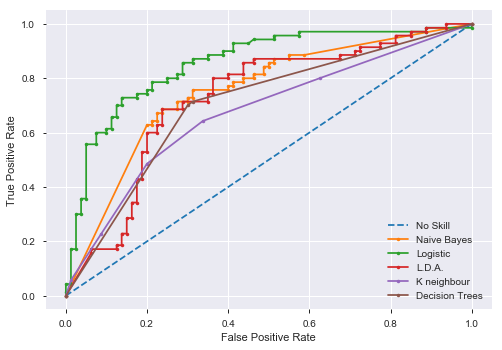

Threshold evaluated in 5.6e-41:
NB Sensitivity: 0.8142857142857143
NB Specificity: 0.5125
LR Sensitivity: 1.0
LR Specificity: 0.0
LDA Sensitivity: 1.0
LDA Specificity: 0.0
KN Sensitivity: 0.8
KN Specificity: 0.375
DT Sensitivity: 0.7142857142857143
DT Specificity: 0.6875

Threshold evaluated in 0.35:
NB Sensitivity: 0.6428571428571429
NB Specificity: 0.7875
LR Sensitivity: 0.8857142857142857
LR Specificity: 0.6125
LDA Sensitivity: 0.7428571428571429
LDA Specificity: 0.65
KN Sensitivity: 0.8
KN Specificity: 0.375
DT Sensitivity: 0.7142857142857143
DT Specificity: 0.6875

Threshold evaluated in 0.5:
NB Sensitivity: 0.6428571428571429
NB Specificity: 0.7875
LR Sensitivity: 0.7857142857142857
LR Specificity: 0.7875
LDA Sensitivity: 0.7142857142857143
LDA Specificity: 0.7125
KN Sensitivity: 0.8
KN Specificity: 0.375
DT Sensitivity: 0.7142857142857143
DT Specificity: 0.6875

Threshold evaluated in 0.75:
NB Sensitivity: 0.6428571428571429
NB Specificity: 0.7875
LR Sensitivity: 0.5571428571428

In [99]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)
lda_probs = classifier_lda.predict_proba(X_test)
kn_probs = classifier_kn.predict_proba(X_test)
dt_probs = classifier_dt.predict_proba(X_test)
#svm_probs = classifier_svm.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
lda_probs = lda_probs[:, 1]
kn_probs = kn_probs[:, 1]
dt_probs = dt_probs[:, 1]
#svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lda_auc = roc_auc_score(y_test, lda_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
#svm_auc = roc_auc_score(y_test, svm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Linear Discriminant Analysis: ROC AUC=%.3f' % (lda_auc))
print('K Neighbor: ROC AUC=%.3f' % (kn_auc))
print('Decision Trees: ROC AUC=%.3f' % (dt_auc))
#print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)
lda_fpr, lda_tpr, lda_thresholds  = roc_curve(y_test, lda_probs)
kn_fpr, kn_tpr, kn_thresholds  = roc_curve(y_test, kn_probs)
dt_fpr, dt_tpr, dt_thresholds  = roc_curve(y_test, dt_probs)
#svm_fpr, svm_tpr, svm_thresholds  = roc_curve(y_test, svm_probs)

#get roc curve metrics
from IPython.display import display

print("\nNS behavior:")
ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

print("\nNB behavior:")
nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

print("\nLR behavior:")
lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

print("\nLDA behavior:")
lda_df = pd.DataFrame(data=[])
lda_df['threshold'] = lda_thresholds
lda_df['tpr'] = lda_tpr
lda_df['fpr'] = lda_fpr
display(lda_df)

print("\nDT behavior:")
dt_df = pd.DataFrame(data=[])
dt_df['threshold'] = dt_thresholds
dt_df['tpr'] = dt_tpr
dt_df['fpr'] = dt_fpr
display(dt_df)

print("\nKN behavior:")
kn_df = pd.DataFrame(data=[])
kn_df['threshold'] = kn_thresholds
kn_df['tpr'] = kn_tpr
kn_df['fpr'] = kn_fpr
display(kn_df)

#svm_df = pd.DataFrame(data=[])
#svm_df['threshold'] = svm_thresholds
#svm_df['tpr'] = svm_tpr
#svm_df['fpr'] = svm_fpr
#display(lr_svm)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
ax1.plot(lda_fpr, lda_tpr, marker='.', label='L.D.A.')
ax1.plot(kn_fpr, kn_tpr, marker='.', label='K neighbour')
ax1.plot(dt_fpr, dt_tpr, marker='.', label='Decision Trees')
#ax1.plot(svm_fpr, svm_tpr, marker='.', label='Supported Vector Machine')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])
    
def evaluate_threshold_lda(threshold):
    print('LDA Sensitivity:', lda_tpr[lda_thresholds > threshold][-1])
    print('LDA Specificity:', 1 - lda_fpr[lda_thresholds > threshold][-1])    

def evaluate_threshold_kn(threshold):
    print('KN Sensitivity:', kn_tpr[kn_thresholds > threshold][-1])
    print('KN Specificity:', 1 - kn_fpr[kn_thresholds > threshold][-1])    

def evaluate_threshold_dt(threshold):
    print('DT Sensitivity:', dt_tpr[dt_thresholds > threshold][-1])
    print('DT Specificity:', 1 - dt_fpr[dt_thresholds > threshold][-1])    
    
#def evaluate_threshold_svm(threshold):
#    print('SVM Sensitivity:', svm_tpr[svm_thresholds > threshold][-1])
#    print('SVM Specificity:', 1 - svm_fpr[svm_thresholds > threshold][-1])    

print("Threshold evaluated in 5.6e-41:")
evaluate_threshold_nb(5.654338e-41)
evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_lda(5.654338e-41)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.35:")
evaluate_threshold_nb(0.357685)
evaluate_threshold_lr(0.357685)
evaluate_threshold_lda(0.357685)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.5:")
evaluate_threshold_nb(0.5)
evaluate_threshold_lr(0.5)
evaluate_threshold_lda(0.5)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

print("\nThreshold evaluated in 0.75:")
evaluate_threshold_nb(0.75)
evaluate_threshold_lr(0.75)
evaluate_threshold_lda(0.75)
evaluate_threshold_kn(5.654338e-41)
evaluate_threshold_dt(5.654338e-41)
#evaluate_threshold_svm(5.654338e-41)

In [100]:
TEST = dataset["Review"][2]
display(TEST)

'Cant say enough good things about this place.'

In [101]:
testimonial = TextBlob(TEST)
testimonial.sentiment.subjectivity

0.55

Try with lower case and normal case

In [102]:
test_lower_po = []
test_lower_sub = []
test_normal_po = []
test_normal_sub = []

for i in range(0, 500):
    data_lower  = dataset["Review"][i]
    data_normal = dataset["Review"][i]
    data_lower = data_lower.lower() #Put all the letters in lowercase
    testimonial = TextBlob(data_lower)
    test_lower_po.append(testimonial.sentiment.polarity)
    test_lower_sub.append(testimonial.sentiment.subjectivity)
    testimonial = TextBlob(data_normal)
    test_normal_po.append(testimonial.sentiment.polarity)
    test_normal_sub.append(testimonial.sentiment.subjectivity)
    
    #review = review.split() #Creates a list of different words
    #ps = PorterStemmer() #We use Stemming for taking the root of words
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review = ' '.join(review) #For reversing the process (list -> string)
    
print(test_lower_po)

[0.46666666666666673, -0.3333333333333333, 0.35, 0.9, 0.375, 0.0, 0.5, 0.0, -1.0, -0.9375, 0.09999999999999998, 0.8, 0.55, 0.25, 1.0, 0.37166666666666665, 0.0, 0.41833333333333333, 0.0, -0.75, 0.0, 0.0, -0.4, 0.125, 0.6000000000000001, -0.15, -0.5, 0.5, 0.125, 0.6, 0.875, 0.0, 1.0, 0.45, -1.0, 0.6454545454545454, 0.0, 0.7500000000000001, -1.0, 1.0, 0.7500000000000001, 0.0, 0.3, -0.05, 0.0, 0.3333333333333333, 0.2, 0.2857142857142857, -0.05, 0.3125, -0.2125, 0.6, 0.0, 0.0, 0.28888888888888886, 0.0625, 0.0, -0.2972222222222222, 1.0, 0.0, -0.16666666666666666, -1.0, 0.875, 0.6000000000000001, 0.8, 0.0, 0.06666666666666667, 1.0, -0.3333333333333333, 0.0, 0.1, -0.17500000000000002, 0.0, 0.5, 0.4777777777777778, 0.02777777777777779, -0.75, 0.6625, 0.48750000000000004, 0.4666666666666667, -0.2020833333333333, 0.0, 0.5, 0.0, 0.0, 0.5854166666666667, 0.0, -0.18888888888888888, 0.5125, -1.0, 0.8, 0.5875, 0.0, -0.15833333333333333, 0.195, 0.0, 0.0, 0.0, 0.75, -0.35, 0.0, 0.2, 0.625, 0.76666666666

In [103]:
test = [test_lower_po,
test_lower_sub,
test_normal_po,
test_normal_sub]
dic = {"test_lower_po":test_lower_po,
"test_lower_sub":test_lower_sub,
"test_normal_po":test_normal_po,
"test_normal_sub":test_normal_sub}

In [104]:
print(dic)

{'test_lower_po': [0.46666666666666673, -0.3333333333333333, 0.35, 0.9, 0.375, 0.0, 0.5, 0.0, -1.0, -0.9375, 0.09999999999999998, 0.8, 0.55, 0.25, 1.0, 0.37166666666666665, 0.0, 0.41833333333333333, 0.0, -0.75, 0.0, 0.0, -0.4, 0.125, 0.6000000000000001, -0.15, -0.5, 0.5, 0.125, 0.6, 0.875, 0.0, 1.0, 0.45, -1.0, 0.6454545454545454, 0.0, 0.7500000000000001, -1.0, 1.0, 0.7500000000000001, 0.0, 0.3, -0.05, 0.0, 0.3333333333333333, 0.2, 0.2857142857142857, -0.05, 0.3125, -0.2125, 0.6, 0.0, 0.0, 0.28888888888888886, 0.0625, 0.0, -0.2972222222222222, 1.0, 0.0, -0.16666666666666666, -1.0, 0.875, 0.6000000000000001, 0.8, 0.0, 0.06666666666666667, 1.0, -0.3333333333333333, 0.0, 0.1, -0.17500000000000002, 0.0, 0.5, 0.4777777777777778, 0.02777777777777779, -0.75, 0.6625, 0.48750000000000004, 0.4666666666666667, -0.2020833333333333, 0.0, 0.5, 0.0, 0.0, 0.5854166666666667, 0.0, -0.18888888888888888, 0.5125, -1.0, 0.8, 0.5875, 0.0, -0.15833333333333333, 0.195, 0.0, 0.0, 0.0, 0.75, -0.35, 0.0, 0.2, 0.

In [105]:
blorg = pd.DataFrame(dic)
display(blorg)

test_lower_po  test_lower_sub  test_normal_po  test_normal_sub
0         0.466667        0.766667        0.466667         0.766667
1        -0.333333        0.666667       -0.333333         0.666667
2         0.350000        0.550000        0.350000         0.550000
3         0.900000        0.900000        0.900000         0.900000
4         0.375000        0.500000        0.375000         0.500000
5         0.000000        0.000000        0.000000         0.000000
6         0.500000        0.500000        0.500000         0.500000
7         0.000000        1.000000        0.000000         1.000000
8        -1.000000        1.000000       -1.000000         1.000000
9        -0.937500        0.750000       -0.937500         0.750000
10        0.100000        0.550000        0.100000         0.550000
11        0.800000        1.000000        0.800000         1.000000
12        0.550000        0.650000        0.550000         0.650000
13        0.250000        0.600000        0.250000         0.600000
14        1.000000        1.000000        1.000000         1.000000
15        0.371667        0.640000        0.371667         0.640000
16        0.000000        0.000000        0.000000         0.000000
17        0.418333        0.656667        0.418333         0.656667
18        0.000000        0.000000        0.000000         0.000000
19       -0.750000        0.750000       -0.750000         0.750000
20        0.000000        0.500000        0.000000         0.500000
21        0.000000        0.000000        0.000000         0.000000
22       -0.400000        0.700000       -0.400000         0.700000
23        0.125000        0.200000        0.125000         0.200000
24        0.600000        0.900000        0.600000         0.900000
25       -0.150000        0.500000       -0.150000         0.500000
26       -0.500000        0.700000       -0.500000         0.700000
27        0.500000        0.888889        0.500000         0.888889
28        0.125000        0.166667        0.125000         0.166667
29        0.600000        1.000000        0.600000         1.000000
..             ...             ...             ...              ...
470      -0.125000        0.375000       -0.125000         0.375000
471       0.625000        0.600000        0.625000         0.600000
472       0.125000        0.666667        0.125000         0.666667
473       1.000000        0.780000        1.000000         0.780000
474      -0.155556        0.288889       -0.155556         0.288889
475       0.800000        0.750000        0.800000         0.750000
476      -0.200000        0.000000       -0.200000         0.000000
477       0.100000        0.475000        0.100000         0.475000
478      -0.300000        0.500000       -0.300000         0.500000
479       0.400000        0.500000        0.400000         0.500000
480       1.000000        1.000000        1.000000         1.000000
481       0.425000        1.000000        0.425000         1.000000
482       0.875000        0.800000        0.875000         0.800000
483       0.000000        0.000000        0.000000         0.000000
484       0.125000        0.125000        0.125000         0.125000
485       0.076190        0.380952        0.076190         0.380952
486       1.000000        0.300000        1.000000         0.300000
487       0.500000        0.500000        0.500000         0.500000
488       0.083333        0.450000        0.083333         0.450000
489       0.133333        0.662500        0.133333         0.662500
490      -0.032500        0.260000       -0.032500         0.260000
491       0.700000        0.600000        0.700000         0.600000
492       1.000000        1.000000        1.000000         1.000000
493       0.250000        0.250000        0.250000         0.250000
494       0.875000        0.600000        0.875000         0.600000
495      -0.371429        0.711905       -0.371429         0.711905
496       0.200000        0.300000        0.200000         0.

In [106]:
import pandas_profiling as pp

# Generate profile
profile = pp.ProfileReport(blorg)

# Display profile
display(profile)

In [107]:
for i in range(0,500):
    test_lower_po[i] = (test_lower_po[i] + 1)/2

In [108]:
print(test_lower_po)

[0.7333333333333334, 0.33333333333333337, 0.675, 0.95, 0.6875, 0.5, 0.75, 0.5, 0.0, 0.03125, 0.55, 0.9, 0.775, 0.625, 1.0, 0.6858333333333333, 0.5, 0.7091666666666667, 0.5, 0.125, 0.5, 0.5, 0.3, 0.5625, 0.8, 0.425, 0.25, 0.75, 0.5625, 0.8, 0.9375, 0.5, 1.0, 0.725, 0.0, 0.8227272727272728, 0.5, 0.875, 0.0, 1.0, 0.875, 0.5, 0.65, 0.475, 0.5, 0.6666666666666666, 0.6, 0.6428571428571428, 0.475, 0.65625, 0.39375, 0.8, 0.5, 0.5, 0.6444444444444444, 0.53125, 0.5, 0.35138888888888886, 1.0, 0.5, 0.4166666666666667, 0.0, 0.9375, 0.8, 0.9, 0.5, 0.5333333333333333, 1.0, 0.33333333333333337, 0.5, 0.55, 0.4125, 0.5, 0.75, 0.7388888888888889, 0.5138888888888888, 0.125, 0.83125, 0.74375, 0.7333333333333334, 0.39895833333333336, 0.5, 0.75, 0.5, 0.5, 0.7927083333333333, 0.5, 0.40555555555555556, 0.75625, 0.0, 0.9, 0.79375, 0.5, 0.42083333333333334, 0.5975, 0.5, 0.5, 0.5, 0.875, 0.325, 0.5, 0.6, 0.8125, 0.8833333333333333, 0.75, 0.85, 1.0, 0.5, 0.03125, 0.5, 0.675, 0.25, 0.43, 0.1875, 0.625, 0.6166666666

In [68]:
print(test_lower_po[2])

0.675


In [86]:
print(len(test_lower_po))

500


In [87]:
print(shape(test_lower_po))

NameError: name 'shape' is not defined